In [209]:
#include packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
train = pd.read_csv('data/train_0.csv')
unseen = pd.read_csv('data/test.csv', index_col='id')
sample = pd.read_csv('data/sample_submission.csv')

In [211]:
train.head()

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.0,0.0,1.8548,-0.0,0.0,0.0,41.8048,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
1,1,1002,-33.206146,-0.0,0.0,1.8548,-0.0,0.0,0.0,42.2616,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
2,1,1002,-33.098114,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.2270,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
3,1,1002,-32.993190,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.8984,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
4,1,1002,-32.887756,-0.0,0.0,1.8548,-0.0,0.0,0.0,44.9606,...,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0


In [212]:
unseen.head()

,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,...,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
id,,,,,,,,,,,,,,,,,,,,,
0,-56.270800,29.510000,17.348600,24.4994,-1.3114,11.006801,-35.776200,73.136800,1.2480,18.3870,...,3.9484,-16.710800,0.0074,71.00,0.0000,-3.264,-6.1330,-6.8750,-7.016,-3.230
1,2.852800,70.196000,8.949000,-8.1522,-65.5772,18.536400,22.926000,87.543800,0.3396,-41.9548,...,-15.4968,-14.876600,0.0050,66.70,0.0000,-1.615,-5.9700,-5.5040,0.000,-6.510
2,52.366400,-98.036800,14.249001,-2.0000,-45.2914,-15.423400,51.288998,-102.055595,6.3570,8.6380,...,0.9058,-27.413600,0.0042,80.40,-0.0316,0.000,0.0000,-3.1290,0.000,-3.678
3,36.365402,53.961403,23.161798,24.8294,-10.3286,-0.918000,16.424799,0.932800,0.3402,39.6276,...,-5.0532,-15.106999,0.0052,96.06,-6.4300,-4.090,-7.8320,-5.7600,0.000,-3.924
4,-23.262400,-53.391003,21.209600,-1.6676,-24.7788,3.481200,-19.681800,-93.913605,4.7832,-4.1376,...,22.2000,24.928001,0.0042,0.00,-9.8800,0.000,-0.4456,-0.4915,-7.830,0.000


In [213]:
#drop train-only columns
train.drop(['game_num', 'event_id', 'event_time', 'player_scoring_next', 'team_scoring_next'], axis=1, inplace=True)

In [214]:
print('train shape : ', train.shape)
print('unseen shape : ', unseen.shape)
print('train nulls : ', train.isnull().sum().sum())
print('unseen nulls : ', unseen.isnull().sum().sum())

train shape :  (2149381, 56)
unseen shape :  (701143, 54)
train nulls :  801864
unseen nulls :  261422


In [215]:
train = train.dropna()
unseen = unseen.fillna(value=unseen.mean())

In [216]:
#calculate distance between ball and player
def distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

#add distance column to train and test
for i in range(0, 6):
    train[f'p{i}_dis_ball'] = distance(train['ball_pos_x'], train['ball_pos_y'], train['ball_pos_z'], train[f'p{i}_pos_x'], train[f'p{i}_pos_y'], train[f'p{i}_pos_z'])
    unseen[f'p{i}_dis_ball'] = distance(unseen['ball_pos_x'], unseen['ball_pos_y'], unseen['ball_pos_z'], unseen[f'p{i}_pos_x'], unseen[f'p{i}_pos_y'], unseen[f'p{i}_pos_z'])


In [217]:
#remove unnecessary columns
train.drop(['ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z'], axis=1, inplace=True)
unseen.drop(['ball_pos_x', 'ball_pos_y', 'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z'], axis=1, inplace=True)

for i in range(0, 6):
    train.drop([f'p{i}_pos_x', f'p{i}_pos_y', f'p{i}_pos_z', f'p{i}_vel_x', f'p{i}_vel_y', f'p{i}_vel_z'], axis=1, inplace=True)
    unseen.drop([f'p{i}_pos_x', f'p{i}_pos_y', f'p{i}_pos_z', f'p{i}_vel_x', f'p{i}_vel_y', f'p{i}_vel_z'], axis=1, inplace=True)


In [218]:
train.head()

,p0_boost,p1_boost,p2_boost,p3_boost,p4_boost,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,team_A_scoring_within_10sec,team_B_scoring_within_10sec,p0_dis_ball,p1_dis_ball,p2_dis_ball,p3_dis_ball,p4_dis_ball,p5_dis_ball
0,33.34,27.33,22.34,33.34,33.34,22.34,0.0,0.0,0.0,0.0,0.0,0.0,0,0,66.679389,75.704241,63.751207,75.716481,66.718735,63.758424
1,33.34,23.84,30.62,33.34,33.34,30.62,0.0,0.0,0.0,0.0,0.0,0.0,0,0,67.375555,74.502210,62.311560,74.956020,67.594946,62.321468
2,33.34,23.14,26.89,33.34,33.34,26.89,0.0,0.0,0.0,0.0,0.0,0.0,0,0,69.216400,73.113543,59.430761,73.946790,69.579973,59.454009
3,33.34,23.14,23.38,31.00,33.34,23.38,0.0,0.0,0.0,0.0,0.0,0.0,0,0,70.547889,69.232442,57.343457,71.798764,71.420682,57.003310
4,33.34,23.14,19.84,27.47,33.34,19.84,0.0,0.0,0.0,0.0,0.0,0.0,0,0,72.667184,66.674854,55.266586,70.070579,73.435541,53.935785


In [219]:
unseen.head()

,p0_boost,p1_boost,p2_boost,p3_boost,p4_boost,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,p0_dis_ball,p1_dis_ball,p2_dis_ball,p3_dis_ball,p4_dis_ball,p5_dis_ball
id,,,,,,,,,,,,,,,,,,
0,0.000,49.40,87.800,69.060000,83.10,71.00,0.0000,-3.264,-6.1330,-6.8750,-7.016,-3.230,50.818851,17.581056,54.995123,85.068643,80.186575,30.752364
1,0.784,34.50,0.000,45.683076,84.20,66.70,0.0000,-1.615,-5.9700,-5.5040,0.000,-6.510,27.892675,14.001493,105.743045,50.975688,20.604631,43.606412
2,37.200,0.00,45.500,47.840000,23.14,80.40,-0.0316,0.000,0.0000,-3.1290,0.000,-3.678,8.921613,154.916217,54.330386,64.840673,4.585974,141.945532
3,88.300,82.44,2.744,36.100000,49.03,96.06,-6.4300,-4.090,-7.8320,-5.7600,0.000,-3.924,61.077702,80.206331,47.202848,89.653711,25.864410,49.255797
4,54.120,43.12,100.000,58.030000,85.50,0.00,-9.8800,0.000,-0.4456,-0.4915,-7.830,0.000,43.871729,26.700240,51.634465,38.078313,86.900109,97.262935


In [220]:
from sklearn.model_selection import train_test_split

#create y_multiLabel from team_A_scoring_within_10sec and team_B_scoring_within_10sec
y = train[['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec']]
X = train.drop(['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
#train a pipeline with a standard scaler and logistic regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression())])
lr_A = pipe.fit(X_train, y_train['team_A_scoring_within_10sec'])
lr_B = pipe.fit(X_train, y_train['team_B_scoring_within_10sec'])


acc A : 0.9419275436579249
acc B : 0.9450828293130206
confusion matrix A :
 [[384200      0]
 [ 23687      0]]
confusion matrix B :
 [[385487      0]
 [ 22400      0]]


/Users/reno/Documents/REPOS/Kaggle/Tabular Playground Series - Oct 2022/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reno/Documents/REPOS/Kaggle/Tabular Playground Series - Oct 2022/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reno/Documents/REPOS/Kaggle/Tabular Playground Series - Oct 2022/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

classification report A :
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    384200
           1       0.00      0.00      0.00     23687

    accuracy                           0.94    407887
   macro avg       0.47      0.50      0.49    407887
weighted avg       0.89      0.94      0.91    407887



/Users/reno/Documents/REPOS/Kaggle/Tabular Playground Series - Oct 2022/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reno/Documents/REPOS/Kaggle/Tabular Playground Series - Oct 2022/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/reno/Documents/REPOS/Kaggle/Tabular Playground Series - Oct 2022/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with

classification report B :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    385487
           1       0.00      0.00      0.00     22400

    accuracy                           0.95    407887
   macro avg       0.47      0.50      0.49    407887
weighted avg       0.89      0.95      0.92    407887

roc_auc_score A : 0.5
roc_auc_score B : 0.5


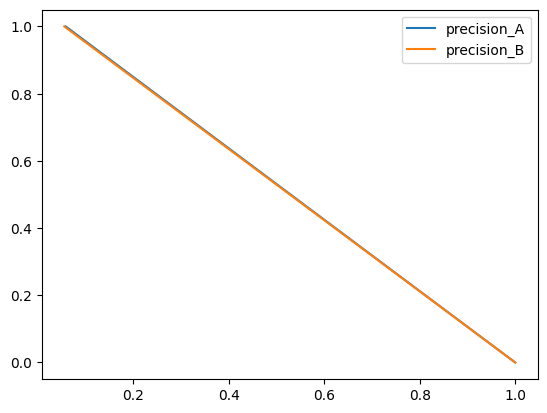

In [237]:
#make predictions on validation set
y_pred_A = lr_A.predict(X_test)
y_pred_B = lr_B.predict(X_test)

#calculate accuracy
from sklearn.metrics import accuracy_score
print ('acc A :', accuracy_score(y_test['team_A_scoring_within_10sec'], y_pred_A))
print ('acc B :', accuracy_score(y_test['team_B_scoring_within_10sec'], y_pred_B))

#print confusion matrix
from sklearn.metrics import confusion_matrix
print('confusion matrix A :\n', confusion_matrix(y_test['team_A_scoring_within_10sec'], y_pred_A))
print('confusion matrix B :\n', confusion_matrix(y_test['team_B_scoring_within_10sec'], y_pred_B))

#get tp, tn, fp, fn
tp_A = confusion_matrix(y_test['team_A_scoring_within_10sec'], y_pred_A)[1,1]
tn_A = confusion_matrix(y_test['team_A_scoring_within_10sec'], y_pred_A)[0,0]
fp_A = confusion_matrix(y_test['team_A_scoring_within_10sec'], y_pred_A)[0,1]
fn_A = confusion_matrix(y_test['team_A_scoring_within_10sec'], y_pred_A)[1,0]

tp_B = confusion_matrix(y_test['team_B_scoring_within_10sec'], y_pred_B)[1,1]
tn_B = confusion_matrix(y_test['team_B_scoring_within_10sec'], y_pred_B)[0,0]
fp_B = confusion_matrix(y_test['team_B_scoring_within_10sec'], y_pred_B)[0,1]
fn_B = confusion_matrix(y_test['team_B_scoring_within_10sec'], y_pred_B)[1,0]

#calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print('classification report A :\n', classification_report(y_test['team_A_scoring_within_10sec'], y_pred_A))
print('classification report B :\n', classification_report(y_test['team_B_scoring_within_10sec'], y_pred_B))

#calculate roc_auc_score
from sklearn.metrics import roc_auc_score
print('roc_auc_score A :', roc_auc_score(y_test['team_A_scoring_within_10sec'], y_pred_A))
print('roc_auc_score B :', roc_auc_score(y_test['team_B_scoring_within_10sec'], y_pred_B))

#calculate precision_recall_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
%matplotlib inline

precision_A, recall_A, thresholds_A = precision_recall_curve(y_test['team_A_scoring_within_10sec'], y_pred_A)
precision_B, recall_B, thresholds_B = precision_recall_curve(y_test['team_B_scoring_within_10sec'], y_pred_B)

plt.plot(precision_A, recall_A, label='precision_A')
plt.plot(precision_B, recall_B, label='precision_B')
plt.legend()
plt.show()

In [228]:
#make predictions on unseen data
team_A_scoring_within_10sec = lr_A.predict(unseen)
team_B_scoring_within_10sec = lr_B.predict(unseen)

In [229]:
#add id column to predictions
submission = pd.DataFrame(y_unseen, columns=['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec'])
submission['id'] = unseen.index

In [230]:
submission.head()

,team_A_scoring_within_10sec,team_B_scoring_within_10sec,id
0,0,0,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4


In [231]:
#select from submission only rows where team_A_scoring_within_10sec or team_B_scoring_within_10sec is 1
print(submission[(submission['team_A_scoring_within_10sec'] == 1) | (submission['team_B_scoring_within_10sec'] == 1)])

        team_A_scoring_within_10sec  team_B_scoring_within_10sec      id
217512                            1                            0  217512
457738                            0                            1  457738
